# LAB | Imbalanced

**Load the data**

In this challenge, we will be working with Credit Card Fraud dataset.

https://raw.githubusercontent.com/data-bootcamp-v4/data/main/card_transdata.csv

Metadata

- **distance_from_home:** the distance from home where the transaction happened.
- **distance_from_last_transaction:** the distance from last transaction happened.
- **ratio_to_median_purchase_price:** Ratio of purchased price transaction to median purchase price.
- **repeat_retailer:** Is the transaction happened from same retailer.
- **used_chip:** Is the transaction through chip (credit card).
- **used_pin_number:** Is the transaction happened by using PIN number.
- **online_order:** Is the transaction an online order.
- **fraud:** Is the transaction fraudulent. **0=legit** -  **1=fraud**


In [1]:
#Libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

In [2]:
fraud = pd.read_csv("https://raw.githubusercontent.com/data-bootcamp-v4/data/main/card_transdata.csv")
fraud.head()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
0,57.877857,0.311140,1.945940,1.0,1.0,0.0,0.0,0.0
1,10.829943,0.175592,1.294219,1.0,0.0,0.0,0.0,0.0
2,5.091079,0.805153,0.427715,1.0,0.0,0.0,1.0,0.0
3,2.247564,5.600044,0.362663,1.0,1.0,0.0,1.0,0.0
4,44.190936,0.566486,2.222767,1.0,1.0,0.0,1.0,0.0


**Steps:**

- **1.** What is the distribution of our target variable? Can we say we're dealing with an imbalanced dataset?
- **2.** Train a LogisticRegression.
- **3.** Evaluate your model. Take in consideration class importance, and evaluate it by selection the correct metric.
- **4.** Run **Oversample** in order to balance our target variable and repeat the steps above, now with balanced data. Does it improve the performance of our model? 
- **5.** Now, run **Undersample** in order to balance our target variable and repeat the steps above (1-3), now with balanced data. Does it improve the performance of our model?
- **6.** Finally, run **SMOTE** in order to balance our target variable and repeat the steps above (1-3), now with balanced data. Does it improve the performance of our model? 

fraud
0.0    91.2597
1.0     8.7403
Name: proportion, dtype: float64


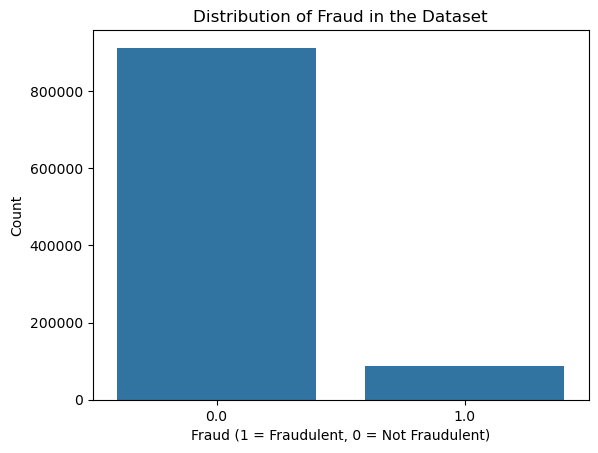

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming the data is loaded into a DataFrame named `df`
# Replace 'df' with the actual DataFrame variable if needed.
df = pd.read_csv("https://raw.githubusercontent.com/data-bootcamp-v4/data/main/card_transdata.csv")

# Check the distribution of the target variable
fraud_distribution = df['fraud'].value_counts(normalize=True) * 100
print(fraud_distribution)

# Plot the distribution
sns.countplot(data=df, x='fraud')
plt.title('Distribution of Fraud in the Dataset')
plt.xlabel('Fraud (1 = Fraudulent, 0 = Not Fraudulent)')
plt.ylabel('Count')
plt.show()


In [4]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Define features and target variable
X = df.drop(columns=['fraud'])
y = df['fraud']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train Logistic Regression model
logreg = LogisticRegression(random_state=42, class_weight='balanced')
logreg.fit(X_train_scaled, y_train)

# Make predictions
y_pred = logreg.predict(X_test_scaled)
y_prob = logreg.predict_proba(X_test_scaled)[:, 1]

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_prob)

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"ROC AUC Score: {roc_auc:.4f}")


Accuracy: 0.9345
Precision: 0.5762
Recall: 0.9483
F1 Score: 0.7168
ROC AUC Score: 0.9796


In [5]:
from imblearn.over_sampling import RandomOverSampler

# Perform random oversampling
oversampler = RandomOverSampler(random_state=42)
X_resampled, y_resampled = oversampler.fit_resample(X_train_scaled, y_train)

# Train Logistic Regression on oversampled data
logreg.fit(X_resampled, y_resampled)

# Make predictions and evaluate
y_pred_oversampled = logreg.predict(X_test_scaled)
y_prob_oversampled = logreg.predict_proba(X_test_scaled)[:, 1]

# Evaluate
accuracy_oversampled = accuracy_score(y_test, y_pred_oversampled)
precision_oversampled = precision_score(y_test, y_pred_oversampled)
recall_oversampled = recall_score(y_test, y_pred_oversampled)
f1_oversampled = f1_score(y_test, y_pred_oversampled)
roc_auc_oversampled = roc_auc_score(y_test, y_prob_oversampled)

print(f"Accuracy (Oversampled): {accuracy_oversampled:.4f}")
print(f"Precision (Oversampled): {precision_oversampled:.4f}")
print(f"Recall (Oversampled): {recall_oversampled:.4f}")
print(f"F1 Score (Oversampled): {f1_oversampled:.4f}")
print(f"ROC AUC Score (Oversampled): {roc_auc_oversampled:.4f}")


Accuracy (Oversampled): 0.9346
Precision (Oversampled): 0.5765
Recall (Oversampled): 0.9482
F1 Score (Oversampled): 0.7171
ROC AUC Score (Oversampled): 0.9796


In [6]:
from imblearn.under_sampling import RandomUnderSampler

# Perform random undersampling
undersampler = RandomUnderSampler(random_state=42)
X_resampled, y_resampled = undersampler.fit_resample(X_train_scaled, y_train)

# Train Logistic Regression on undersampled data
logreg.fit(X_resampled, y_resampled)

# Make predictions and evaluate
y_pred_undersampled = logreg.predict(X_test_scaled)
y_prob_undersampled = logreg.predict_proba(X_test_scaled)[:, 1]

# Evaluate
accuracy_undersampled = accuracy_score(y_test, y_pred_undersampled)
precision_undersampled = precision_score(y_test, y_pred_undersampled)
recall_undersampled = recall_score(y_test, y_pred_undersampled)
f1_undersampled = f1_score(y_test, y_pred_undersampled)
roc_auc_undersampled = roc_auc_score(y_test, y_prob_undersampled)

print(f"Accuracy (Undersampled): {accuracy_undersampled:.4f}")
print(f"Precision (Undersampled): {precision_undersampled:.4f}")
print(f"Recall (Undersampled): {recall_undersampled:.4f}")
print(f"F1 Score (Undersampled): {f1_undersampled:.4f}")
print(f"ROC AUC Score (Undersampled): {roc_auc_undersampled:.4f}")


Accuracy (Undersampled): 0.9348
Precision (Undersampled): 0.5771
Recall (Undersampled): 0.9494
F1 Score (Undersampled): 0.7178
ROC AUC Score (Undersampled): 0.9796


In [7]:
from imblearn.over_sampling import SMOTE

# Perform SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train_scaled, y_train)

# Train Logistic Regression on SMOTE-resampled data
logreg.fit(X_resampled, y_resampled)

# Make predictions and evaluate
y_pred_smote = logreg.predict(X_test_scaled)
y_prob_smote = logreg.predict_proba(X_test_scaled)[:, 1]

# Evaluate
accuracy_smote = accuracy_score(y_test, y_pred_smote)
precision_smote = precision_score(y_test, y_pred_smote)
recall_smote = recall_score(y_test, y_pred_smote)
f1_smote = f1_score(y_test, y_pred_smote)
roc_auc_smote = roc_auc_score(y_test, y_prob_smote)

print(f"Accuracy (SMOTE): {accuracy_smote:.4f}")
print(f"Precision (SMOTE): {precision_smote:.4f}")
print(f"Recall (SMOTE): {recall_smote:.4f}")
print(f"F1 Score (SMOTE): {f1_smote:.4f}")
print(f"ROC AUC Score (SMOTE): {roc_auc_smote:.4f}")


Accuracy (SMOTE): 0.9345
Precision (SMOTE): 0.5760
Recall (SMOTE): 0.9485
F1 Score (SMOTE): 0.7167
ROC AUC Score (SMOTE): 0.9796
